In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
diabetes_dataset=load_diabetes()

In [57]:
dir(diabetes_dataset)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [58]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [59]:
pd.DataFrame(diabetes_dataset.target).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [60]:
data=pd.DataFrame(diabetes_dataset.data,columns=['Age','Sex','Bmi','Bp','Tc','Ldl','Hdl','Tch','Ltg','Glu'])
data['Target']=diabetes_dataset.target
target=pd.DataFrame(diabetes_dataset.target,columns=['Target'])

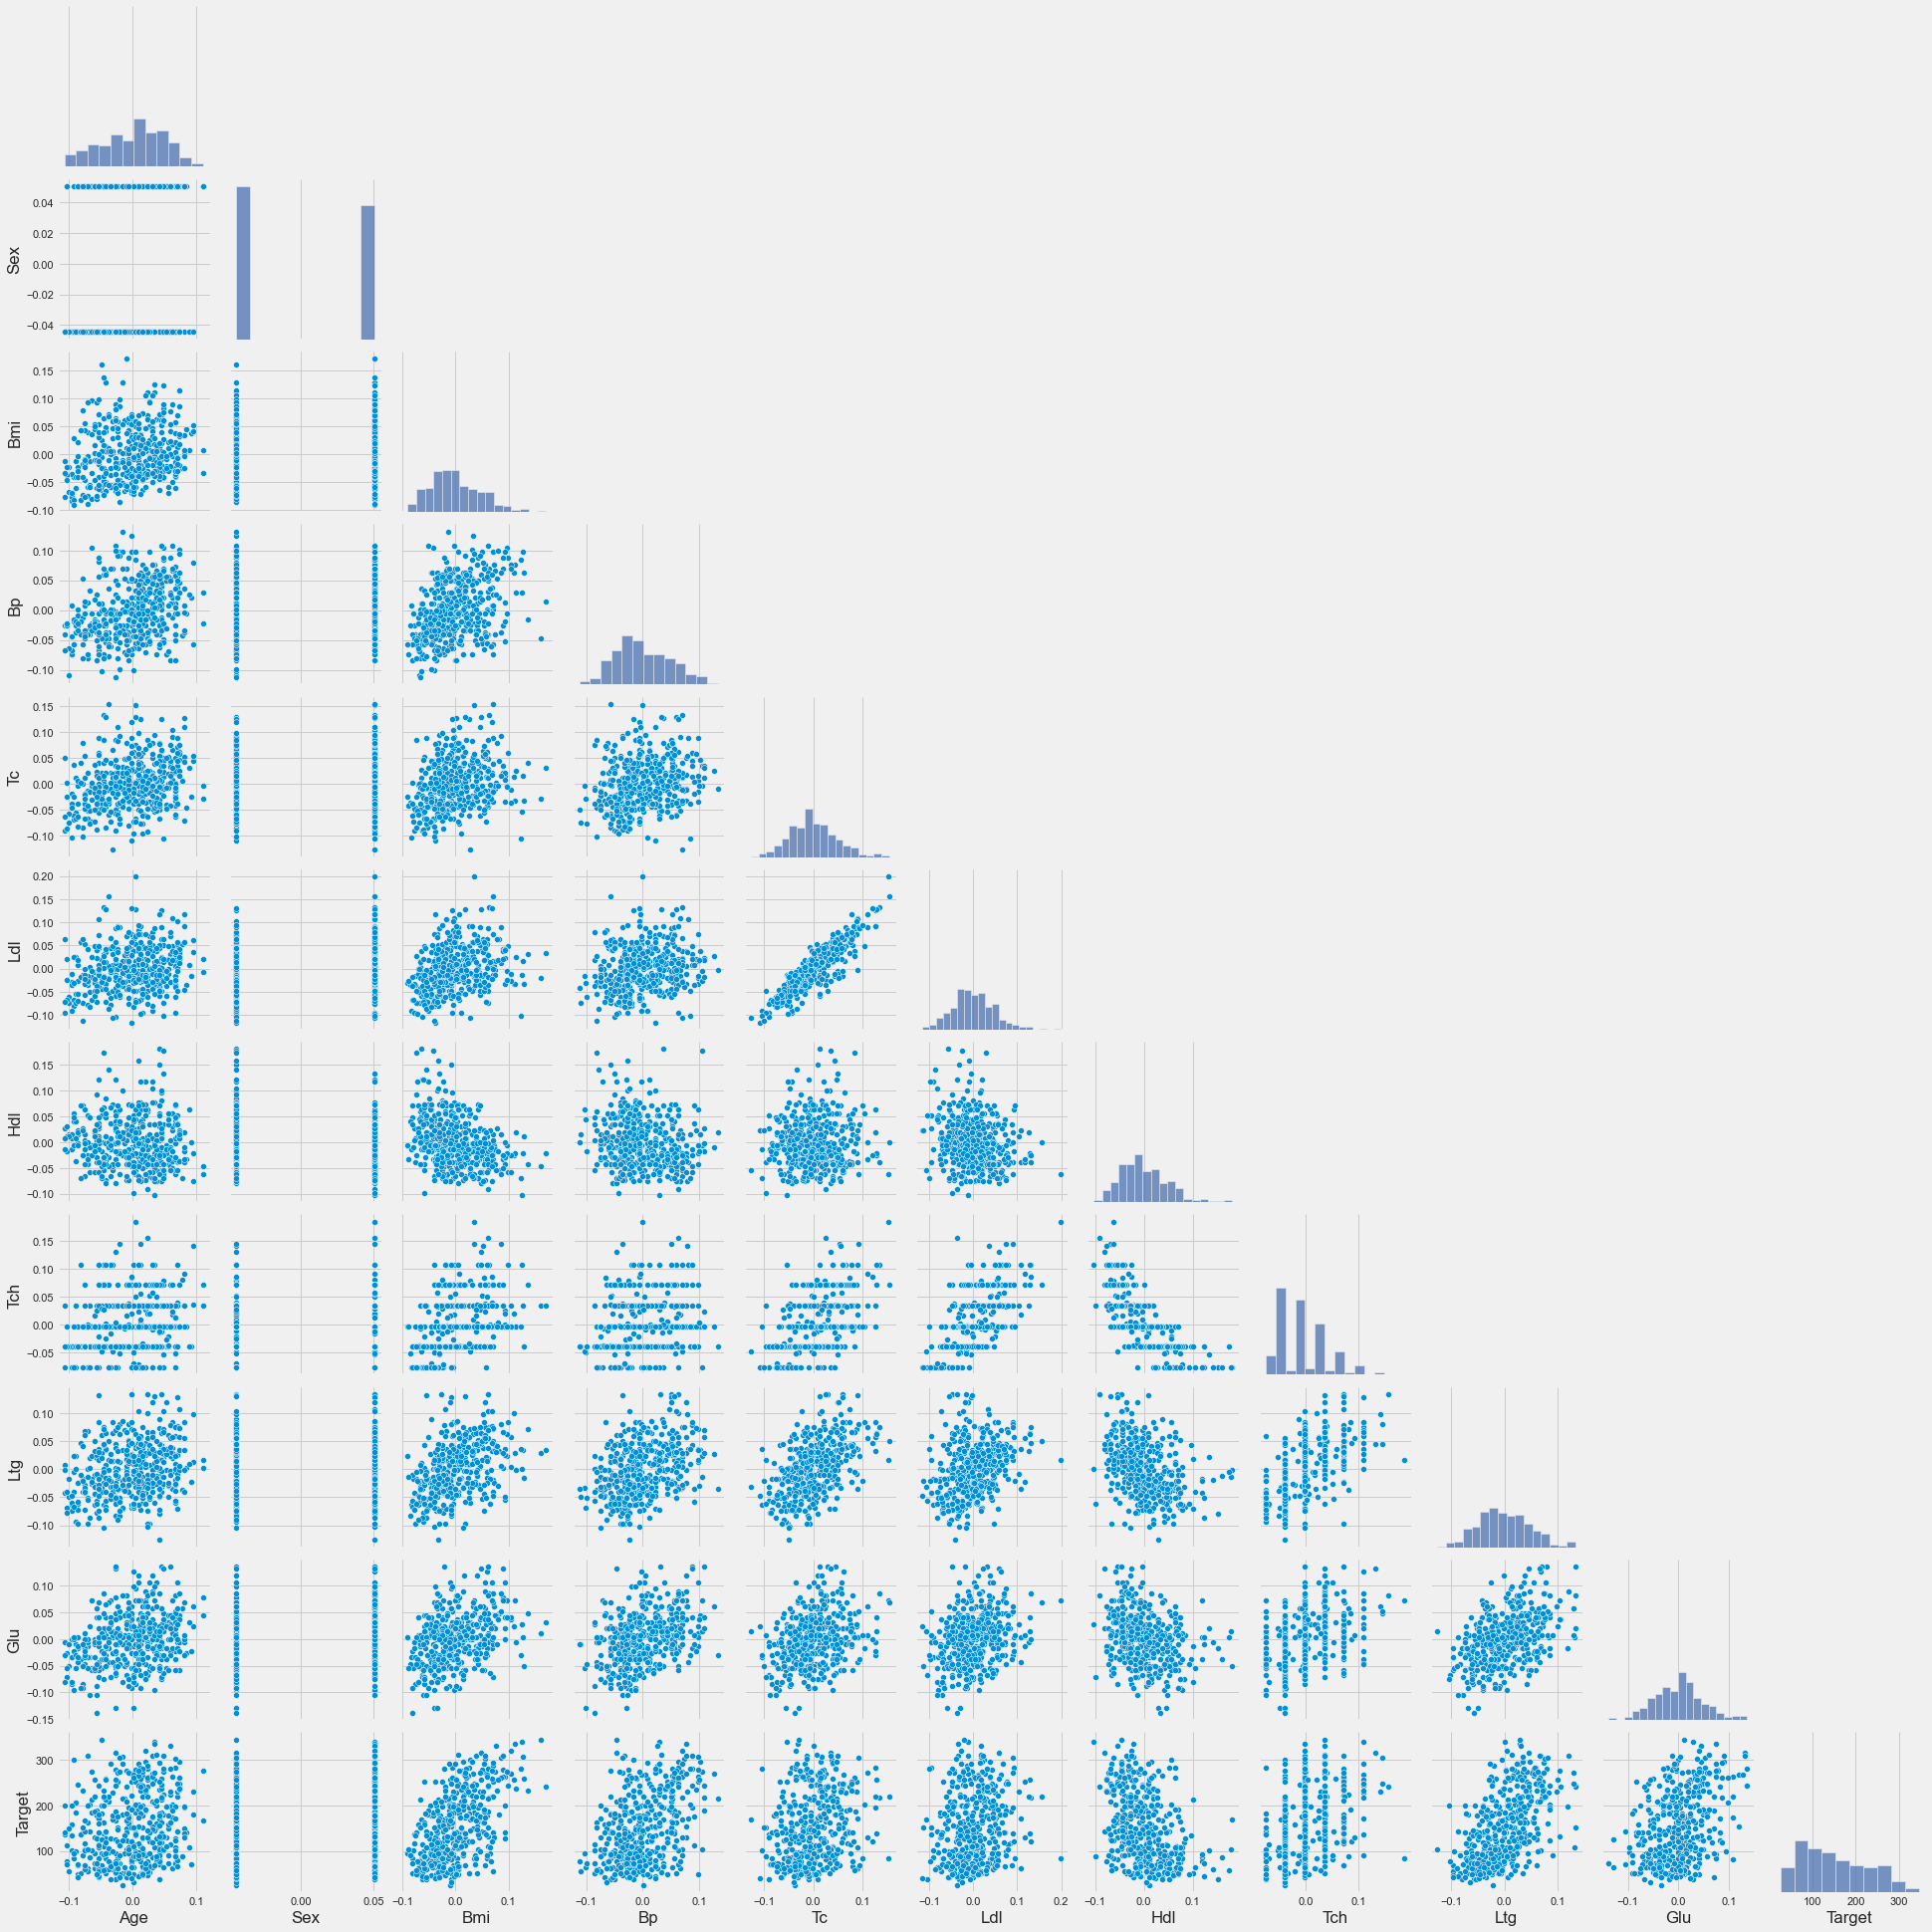

Wall time: 13.5 s


In [61]:
%%time
sns.pairplot(data,corner=True)
plt.show()

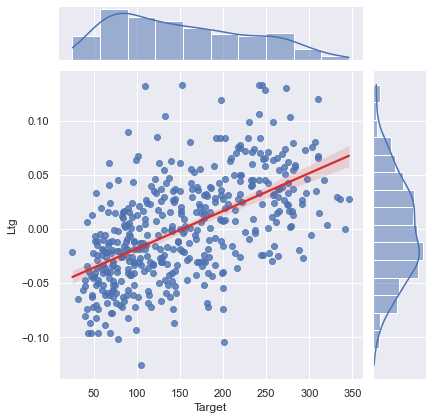

In [62]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Target'],y=data['Ltg'],kind="reg", joint_kws={"line_kws":{'color':'#D32F2F'}})
plt.show()

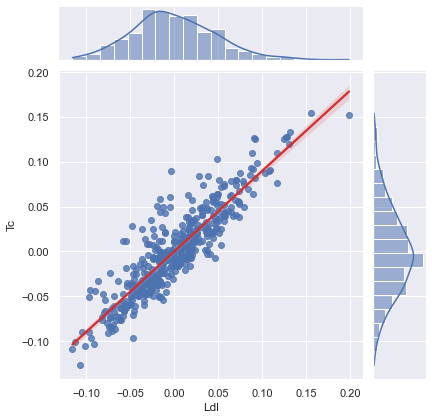

In [63]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Ldl'],y=data['Tc'],kind="reg", joint_kws={"line_kws":{'color':'#D32F2F'}})
plt.show()

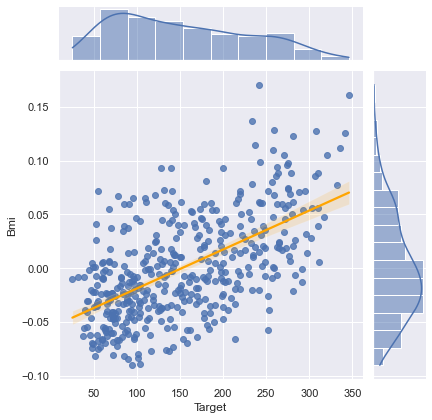

In [64]:
sns.set_theme(style="darkgrid")
sns.jointplot(x=data['Target'],y=data['Bmi'],kind="reg", joint_kws={"line_kws":{'color':'orange'}})
plt.show()

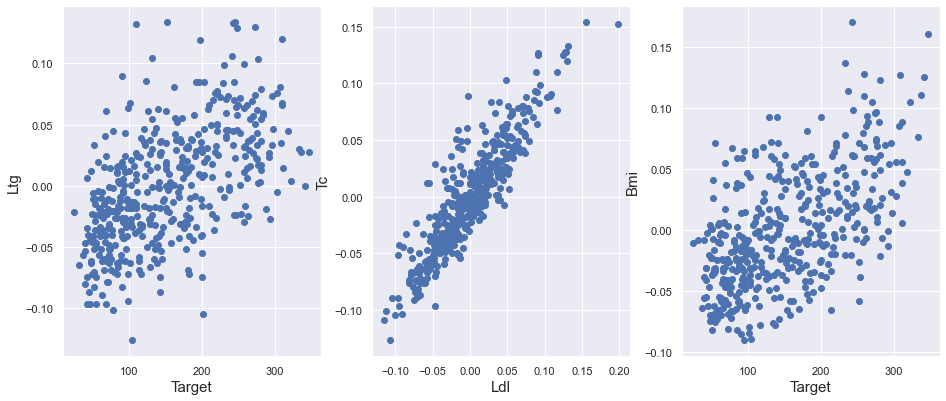

In [65]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)

plt.scatter(data['Target'],data['Ltg'],)
plt.xlabel('Target',size=15)
plt.ylabel('Ltg',size=15)

plt.subplot(1,3,2)
plt.scatter(data['Ldl'],data['Tc'])
plt.xlabel('Ldl',size=15)
plt.ylabel('Tc',size=15)

plt.subplot(1,3,3)
plt.scatter(data['Target'],data['Bmi'])
plt.xlabel('Target',size=15)
plt.ylabel('Bmi',size=15)

plt.show()

In [66]:
masks=np.zeros_like(data.corr())
triau_ang=np.triu_indices_from(masks)
masks[triau_ang]=True

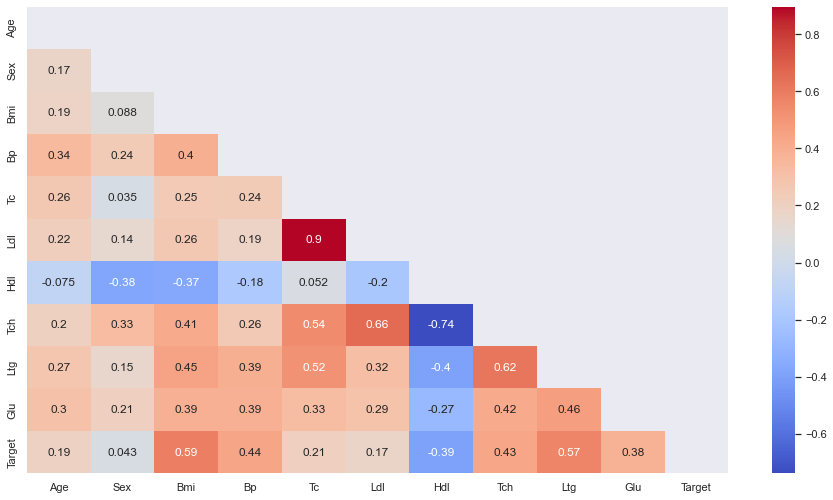

In [67]:
plt.figure(figsize=(14,8))
sns.heatmap(data=data.corr(),mask=masks, annot=True,cmap=cm.coolwarm)
plt.style.use('fivethirtyeight')
plt.show()

In [68]:
featurs=data.drop(['Target','Hdl','Tch'],axis=1)
X_train,x_test,Y_train,y_test= train_test_split(np.array(featurs),np.array(target),test_size=0.3)
print(f'features type {type(featurs)}\nTarget type {type(target)}')

features type <class 'pandas.core.frame.DataFrame'>
Target type <class 'pandas.core.frame.DataFrame'>


In [69]:
model=sm.OLS(Y_train,X_train.astype(float))
results=model.fit()

In [70]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              3.655
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                    0.000441
Time:                        00:40:16   Log-Likelihood:                         -2011.7
No. Observations:                 309   AIC:                                      4039.
Df Residuals:                     301   BIC:                                      4069.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
Table=pd.DataFrame(results.pvalues,columns=['P-value']).round(3)
Table['BIC']=results.bic.round(2)
Table

,P-value,BIC
0,0.890,4069.22
1,0.148,4069.22
2,0.062,4069.22
3,0.739,4069.22
4,0.259,4069.22
5,0.333,4069.22
6,0.007,4069.22
7,0.645,4069.22


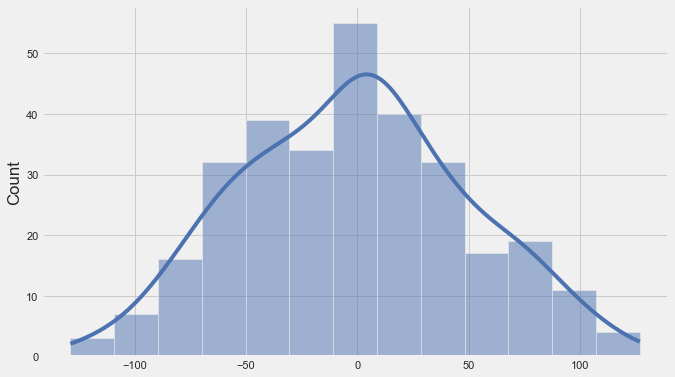

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(results.fittedvalues,kde=True)
plt.show()

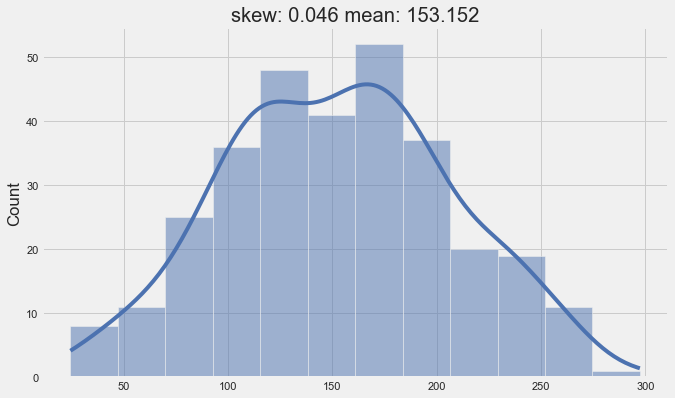

In [73]:
plt.figure(figsize=(10,6))
sk=pd.DataFrame(results.resid).skew()[0]
sns.histplot(results.resid,kde=True)
plt.title(f'skew: {round(sk,3)} mean: {round(results.resid.mean(),3)}')
plt.show()

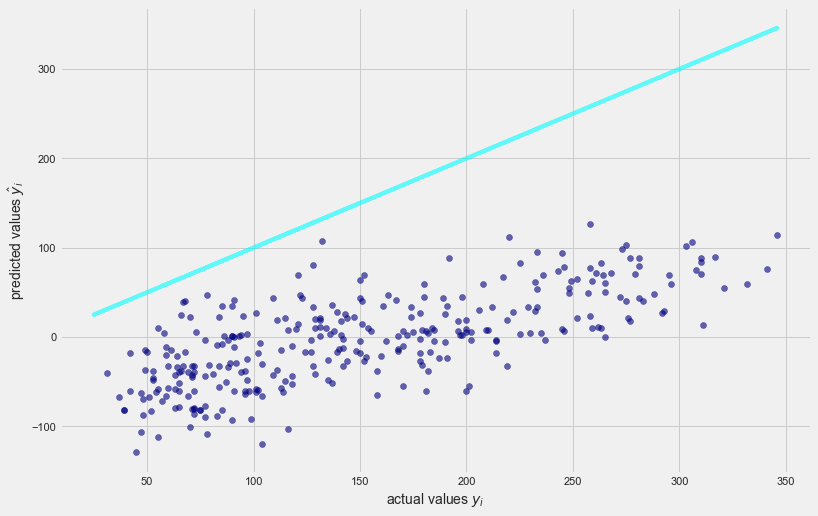

In [74]:

plt.figure(figsize=(12,8))
plt.scatter(x=Y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.plot(target,target,color='cyan',alpha=0.6)
plt.xlabel("actual values $y _i$", fontsize=14)
plt.ylabel("predicted values $\haty _i$",fontsize=14)
plt.show()

## Using Sklearn built in LinearRegrssion module

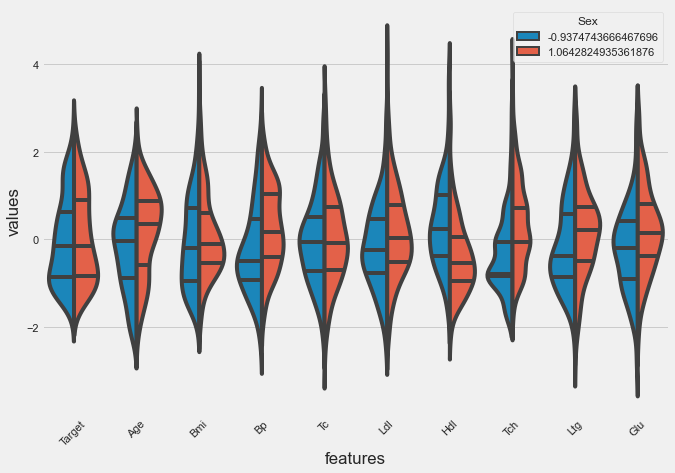

In [75]:
x=(data.Target-data.Target.mean())/data.Target.std()
y=data.drop(['Target'],axis=1)
features_bar=(y-y.mean())/y.std()
features=pd.concat([x,features_bar.iloc[:,0:10]],axis=1)
features=pd.melt(features,id_vars='Sex',var_name='features',value_name='values')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.violinplot(x='features',y='values',data=features,split=True,inner='quart',hue='Sex')
plt.xticks(rotation=45)
plt.show()

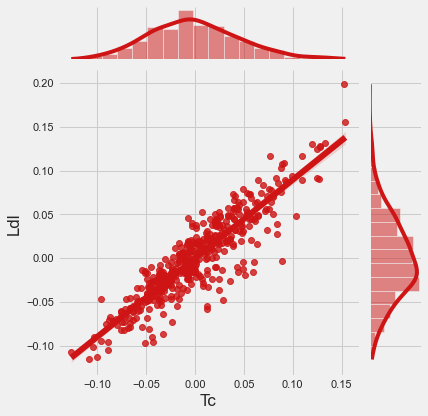

In [76]:
sns.jointplot(x=data.Tc,y=data.Ldl,kind='reg',color='#ce1414')

<AxesSubplot:xlabel='features', ylabel='values'>

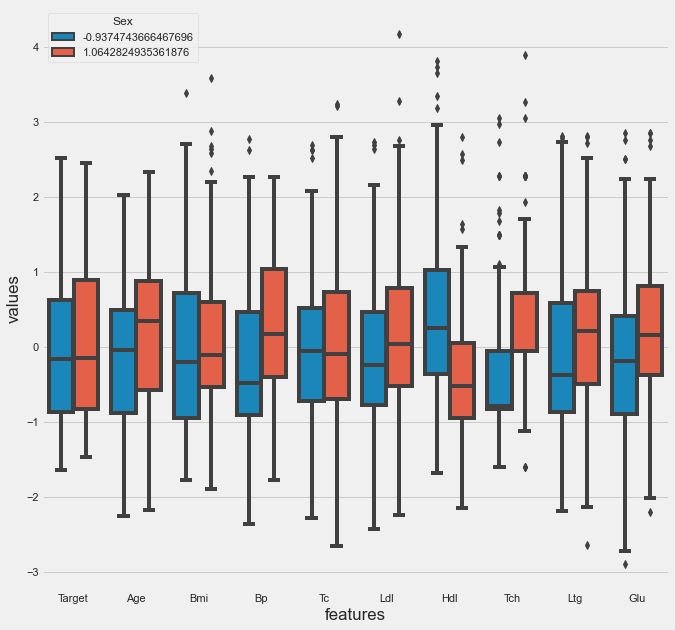

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features',y='values',data=features,hue="Sex")

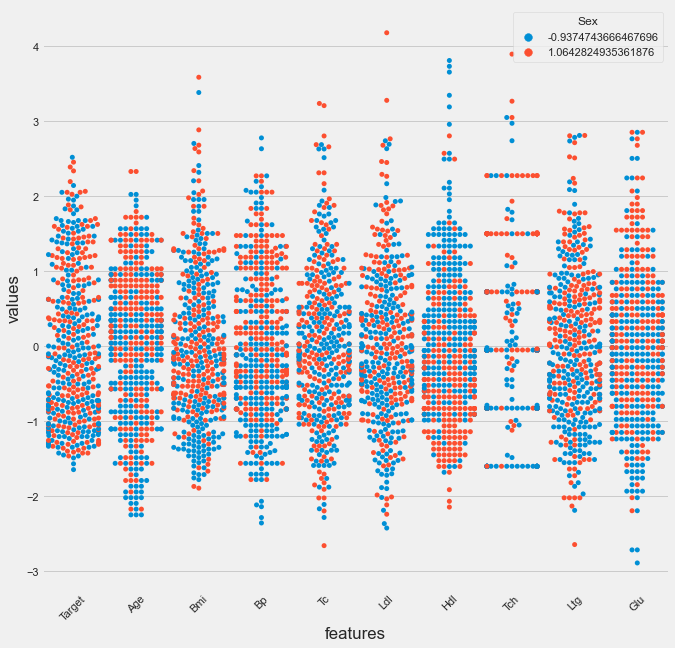

In [78]:
x=(data.Target-data.Target.mean())/data.Target.std()
y=data.drop(['Target'],axis=1)
features_bar=(y-y.mean())/y.std()
features=pd.concat([x,features_bar.iloc[:,0:10]],axis=1)
features=pd.melt(features,id_vars='Sex',var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='values',data=features,hue='Sex')
plt.xticks(rotation=45)
plt.show()

# linear regression

In [79]:
new_x=data.iloc[:,1:-1].values
new_y=data.iloc[:,-1].values

In [80]:
f=data

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=sc.fit_transform(target)
sc_y=StandardScaler()
f=sc_y.fit_transform(f)

In [82]:
ml=sm.OLS(t.astype(float),f.astype(float),)
a=ml.fit()
print(a.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.908e+31
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                        0.00
Time:                        00:40:21   Log-Likelihood:                          14573.
No. Observations:                 442   AIC:                                 -2.912e+04
Df Residuals:                     431   BIC:                                 -2.908e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
sc_y=StandardScaler()
new_y=sc_y.fit_transform(new_y.reshape(len(new_y),1))
sc_x=StandardScaler()
new_x=sc_x.fit_transform(new_x)
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.2)

In [84]:
from sklearn.linear_model import LinearRegression
linearRegressor=LinearRegression()
linearRegressor.fit(x_train,y_train)
linearRegressor.score(x_test,y_test)

0.5061222607794237

In [85]:
from sklearn.tree import DecisionTreeRegressor
dcregression=DecisionTreeRegressor(random_state=0)
dcregression.fit(x_train,y_train)
dcregression.score(x_test,y_test)
mse(y_test,dcregression.predict(x_test))
r2_score(y_test,dcregression.predict(x_test))

0.3035504427968583

In [86]:
from sklearn.ensemble import RandomForestRegressor
randomreg=RandomForestRegressor(random_state=0)
randomreg.fit(x_train,y_train)
randomreg.score(x_test,y_test)
mse(y_test,randomreg.predict(x_test))
r2_score(y_test,randomreg.predict(x_test))

0.4767439452587513

In [87]:
from sklearn.svm import SVR
svmreg=SVR(kernel='rbf')
svmreg.fit(x_train,y_train)
svmreg.score(x_test,y_test)
mse(y_test,svmreg.predict(x_test))
r2_score(y_test,svmreg.predict(x_test))

0.511733888708995